<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [186]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [187]:
#Get the stock quote
data = yf.download('TSLA', start=start_date, end=end_date)
#df = web.DataReader('TSLA', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...
2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800
2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100


In [189]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

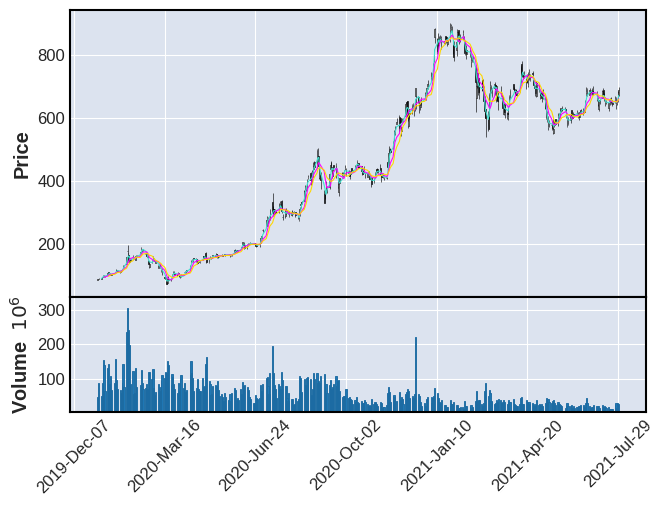

In [190]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [191]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [199]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.01702913],
       [0.02017398],
       [0.02227796],
       [0.02659937],
       [0.0322922 ],
       [0.02962831],
       [0.02884147],
       [0.04036278],
       [0.0435841 ],
       [0.03879404],
       [0.0375583 ],
       [0.03682079],
       [0.04587307],
       [0.0513883 ],
       [0.05203947],
       [0.05021914],
       [0.04854188],
       [0.05073219],
       [0.05420757],
       [0.06896254],
       [0.07136989],
       [0.10329458],
       [0.12970157],
       [0.09212106],
       [0.09563838],
       [0.09541885],
       [0.10114373],
       [0.10190838],
       [0.10015957],
       [0.10921432],
       [0.10823509],
       [0.12263239],
       [0.13719003],
       [0.13274777],
       [0.13313994],
       [0.11656219],
       [0.10820549],
       [0.10299858],
       [0.07838233],
       [0.07566665],
       [0.09432123],
       [0.09478742],
       [0.09577156],
       [0.08961504],
       [0.08442046],
       [0.06086975],
       [0.07007741],
       [0.067

In [200]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.01702913, 0.02017398, 0.02227796, 0.02659937, 0.0322922 ,
       0.02962831, 0.02884147, 0.04036278, 0.0435841 , 0.03879404,
       0.0375583 , 0.03682079, 0.04587307, 0.0513883 , 0.05203947,
       0.05021914, 0.04854188, 0.05073219, 0.05420757, 0.06896254,
       0.07136989, 0.10329458, 0.12970157, 0.09212106, 0.09563838,
       0.09541885, 0.10114373, 0.10190838, 0.10015957, 0.10921432,
       0.10823509, 0.12263239, 0.13719003, 0.13274777, 0.13313994,
       0.11656219, 0.10820549, 0.10299858, 0.07838233, 0.07566665,
       0.09432123, 0.09478742, 0.09577156, 0.08961504, 0.08442046,
       0.06086975, 0.07007741, 0.06733954, 0.04916593, 0.04573001,
       0.0206821 , 0.01701432, 0.        , 0.01638288, 0.01635575,
       0.01802315, 0.03546419, 0.04391215, 0.04117675, 0.03777289])]
[0.03475628958852818]



In [201]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [202]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [203]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [204]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 33ms/step - loss: 0.0230


In [205]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [206]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [207]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [208]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

50.247458928748024

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


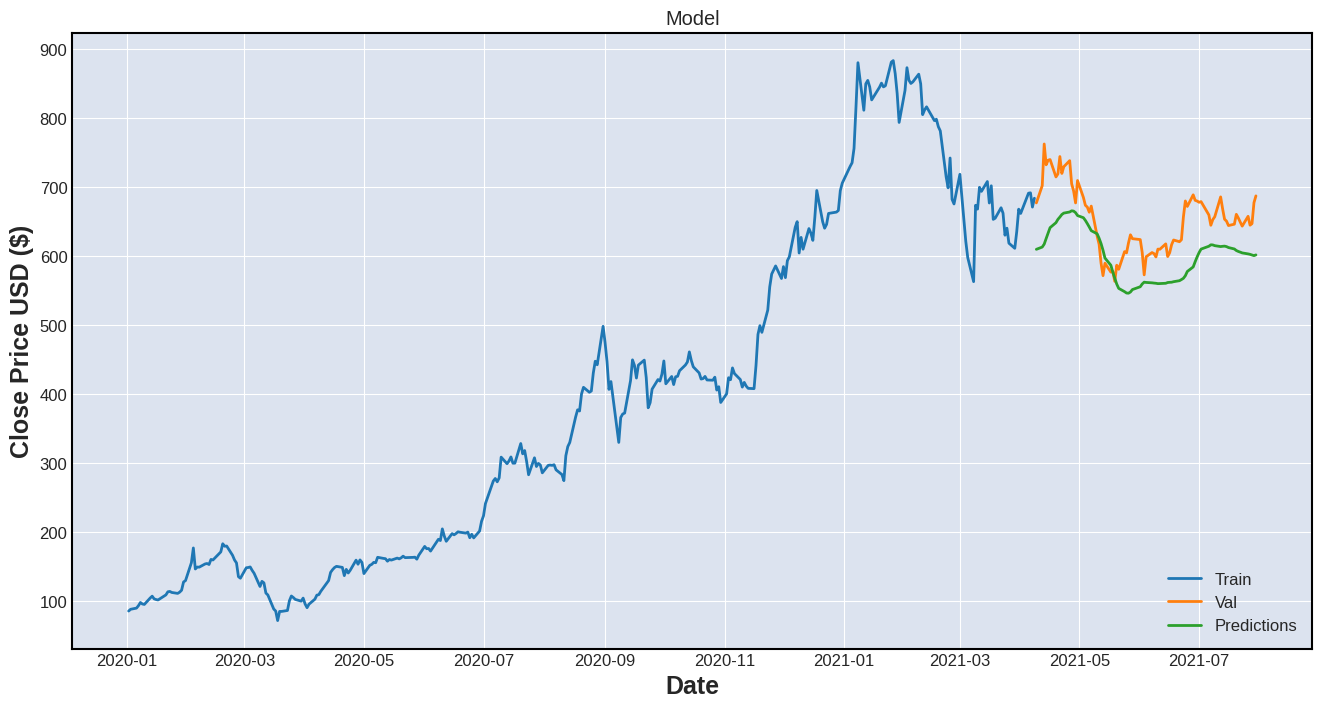

In [209]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [210]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,677.020020,609.807617
2021-04-12,701.979980,613.096008
2021-04-13,762.320007,617.319153
2021-04-14,732.229980,625.426758
2021-04-15,738.849976,633.356262
...,...,...
2021-07-26,657.619995,603.176575
2021-07-27,644.780029,602.527771
2021-07-28,646.979980,601.574341


In [211]:
#get the quote
apple_quote = yf.download('TSLA', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[604.4299]]
